In [2]:
import pandas as pd
import numpy as np
credit = pd.read_csv('C:/Users/imelvis/Dropbox/UST/Spring2018/ISOM5610/Pre/logistic/loan_data_clear.csv')

In [3]:
credit['SEX']=credit['SEX'].astype(str)
credit['MARRIAGE']=credit['MARRIAGE'].astype(str)

In [4]:
train_set=credit[0:21000]
test_set=credit[21000:]

# Proportion of non-default and default case

In [6]:
my_tab = pd.crosstab(index=credit["default"],  columns="count")      
my_tab/my_tab.sum()

col_0,count
default,
0,0.7788
1,0.2212


# The Full Model

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

all_columns = "+".join(credit.columns[0:23])
my_formula="default~"+all_columns

full_model = smf.glm(formula = my_formula, data=train_set, family=sm.families.Binomial()).fit()

print(full_model.summary())

C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20960
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9449.1
Date:                Wed, 28 Feb 2018   Deviance:                       18898.
Time:                        10:33:15   Pearson chi2:                 2.34e+04
No. Iterations:                     6                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.1850      1.054     -3.971      0.000      -6.251      -2.119
SEX[T.2

# Forward Selection

In [1]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import functools
import re



def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)


def forward_selected(data,null_formula,full_formula,response,intercept):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """
    print('null model:'+ null_formula)
    print('full model:'+full_formula)
    
    null_temp        = re.split('~',null_formula)
    null_predic_com  = null_temp[1].split('+')
    null_predic      = null_predic_com[1:len(null_predic_com)]
    full_temp        = re.split('~',full_formula)
    full_predic_com  = full_temp[1].split('+')
    full_predic      = full_predic_com[1:len(full_predic_com)]
    indices          = [i for i,id in enumerate(full_predic) if id not in null_predic]
    domain           = [full_predic[i] for i in indices]

    start            = set(null_predic)
    remaining        = set(domain)
    selected         = null_predic
    current_score, best_new_score = 10000000, 10000000
    score_aic        = []
    variable_added   = []
    flag=0
    #step=2
    step=np.max(indices)+1
    #print (step)
    while (remaining and current_score == best_new_score and step >0):
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
            if intercept ==0:
                formula = formula + "-1"
            score = smf.glm(formula, data, family=sm.families.Binomial()).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            score_aic.append(best_new_score)
            variable_added.append(best_candidate)
            current_score = best_new_score
        step=step-1
    formula = "{} ~ {}".format(response,' + '.join(selected))
    if intercept ==0:
        formula = formula + "-1"
    model = smf.glm(formula, data, family=sm.families.Binomial()).fit()
    #print('final model:'+ formula)
    return model
    
    

In [53]:
forward=forward_selected(data=train_set,null_formula='default~1',full_formula=my_formula,response='default',intercept=1)
forward.summary()


null model:default~1
full model:default~LIMIT_BA+SEX+EDUCATION+MARRIAGE+AGE+PAY_1+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6
final model:default ~ PAY_1 + PAY_3 + PAY_5 + PAY_AMT1 + PAY_2 + EDUCATION + MARRIAGE + PAY_6 + PAY_AMT2 + SEX + PAY_AMT6 + PAY_4 + PAY_AMT4 + BILL_AMT3 + BILL_AMT1 + BILL_AMT2 + PAY_AMT3


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9488.8
Date:                Sun, 18 Feb 2018   Deviance:                       18978.
Time:                        22:53:41   Pearson chi2:                 2.68e+04
No. Iterations:                     6                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.5312      1.052     -4.309      0.000      -6.592      -2.470
PAY_1[T.paid_in_full]         0.1232      0.120      1.023      0.306      -0.113       0.359
PAY_1[T.payment_delay]        0.9910      0.100      9.907      0.000       0.795       1.187
PAY_1[T.revolving_credit]    -1.0551      0.123     -8.547      0.000      -1.297      -0.813
PAY_3[T.paid_in_full]        -0.1241      0.124     -0.998      0.318      -0.368       0.120
PAY_3[T.payment_delay]        0.3531      0.147      2.408      0.016       0.066       0.641
PAY_3[T.revolving_credit]    -0.0828      0.145     -0.572      0.567      -0.366       0.201
PAY_5[T.paid_in_full]        -0.0751      0.123     -0.609      0.542      -0.317       0.167
PAY_5[T.payment_delay]        0.4059      0.152      2.663      0.008       0.107       0.705
PAY_5[T.revolving_credit]     0.0649      0.137      0.475      0.635      -0.203       0.333
PAY_2[T.paid_in_full]         0.3018      0.124      2.431      0.015       0.059       0.545
PAY_2[T.payment_delay]        0.5657      0.129      4.374      0.000       0.312       0.819
PAY_2[T.revolving_credit]     1.0763      0.145      7.426      0.000       0.792       1.360
EDUCATION[T.HS]               0.0713      0.056      1.267      0.205      -0.039       0.182
EDUCATION[T.Uni]              0.0532      0.043      1.251      0.211      -0.030       0.136
EDUCATION[T.others]          -1.2639      0.275     -4.592      0.000      -1.803      -0.724
MARRIAGE[T.1]                 2.9842      1.048      2.846      0.004       0.929       5.039
MARRIAGE[T.2]                 2.8301      1.049      2.699      0.007       0.775       4.885
MARRIAGE[T.3]                 3.0159      1.061      2.843      0.004       0.937       5.095
PAY_6[T.paid_in_full]        -0.1358      0.093     -1.463      0.144      -0.318       0.046
PAY_6[T.payment_delay]        0.1050      0.116      0.906      0.365      -0.122       0.332
PAY_6[T.revolving_credit]    -0.2643      0.101     -2.614      0.009      -0.463      -0.066
SEX[T.2]                     -0.1316      0.037     -3.536      0.000      -0.205      -0.059
PAY_4[T.paid_in_full]         0.0054      0.127      0.042      0.966      -0.243       0.253
PAY_4[T.payment_delay]        0.2717      0.153      1.771      0.076      -0.029       0.572
PAY_4[T.revolving_credit]     0.0611      0.143      0.428      0.668      -0.218       0.341
PAY_AMT1                  -1.786e-05   3.06e-06     -5.833      0.000   -2.39e-05   -1.19e-05
PAY_AMT2                  -8.779e-06   2.33e-06     -3.766      0.000   -1.33e-05   -4.21e-06
PAY_AMT6                  -4.015e-06   1.57e-06     -2.557      0.011   -7.09e-06   -9.37e-07
PAY_AMT4                   -4.15e-06   1.98e-06     -2.094      0.036   -8.03e-06   -2.66e-07
BILL_AMT3                  1.375e-06   1.22e-06      1.130  

# Model without AGE

In [9]:

all_columns = "+".join(credit.columns[0:23])
my_formula="default~"+all_columns+"-AGE"

new_model = smf.glm(formula = my_formula, data=train_set, family=sm.families.Binomial()).fit()

print(new_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20961
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9449.5
Date:                Wed, 28 Feb 2018   Deviance:                       18899.
Time:                        10:33:29   Pearson chi2:                 2.34e+04
No. Iterations:                     6                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.1192      1.051     -3.918      0.000      -6.180      -2.058
SEX[T.2

# Classification
    * predict default if probability>0.5

In [32]:
prob=new_model.predict(test_set)
predictions = [ 0 if p < 0.5 else 1 for p in prob]

* Confusion Matrix
    * The reported confusion matrix is structured as follow: Actual is put horizontally and predicted is put vertically

In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_set["default"], 
                       predictions))

[[6849  311]
 [1219  621]]


* Error Measure

In [56]:
tn, fp, fn, tp = confusion_matrix(test_set["default"], predictions).ravel()
#print(tn,fp,fn,tp)
sensitivity=tp/(tp+fn)
specificity=tn/(fp+tn)
misClassError=(fp+fn)/(fp+fn+tn+tp)
print ('Sensitivity:',sensitivity,'\nSpecificity:',specificity,'\nMiss Classification Rate:',misClassError)

Sensitivity: 0.3375 
Specificity: 0.95656424581 
Miss Classification Rate: 0.17


# ROC Curve

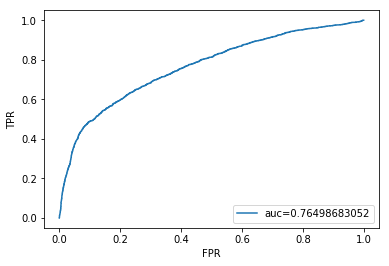

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = prob
y_test=test_set['default']
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

# Confidence Interval for the odds ratio

In [10]:
np.exp(new_model.conf_int(alpha=0.05))

,0,1
Intercept,0.002070,0.127654
SEX[T.2],0.818327,0.947256
EDUCATION[T.HS],0.864073,1.083243
EDUCATION[T.Uni],0.902372,1.069661
EDUCATION[T.others],0.150063,0.443516
MARRIAGE[T.1],2.588077,156.980214
MARRIAGE[T.2],2.122728,128.817295
MARRIAGE[T.3],2.438159,155.184082
PAY_1[T.paid_in_full],0.898193,1.445519
PAY_1[T.payment_delay],2.131162,3.162032
